# FRB 180916.J0158 + 65: Espectro

El archivo de datos sunspots.dat contiene el conteo histórico de manchas solares desde 1850 hasta 2015.

In [14]:
import numpy as np
import pandas as pd
from math import pi
from numpy.fft import fft, fftfreq, rfft, rfftfreq
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['font.size'] = 16
rcParams['figure.figsize'] = 15,6

In [15]:
data_crudos = pd.read_csv("/home/wattie/frb/conteo.csv", index_col='mjd')
serie = data_crudos.dropna()
df = pd.DataFrame(serie)

Text(0, 0.5, 'Flux')

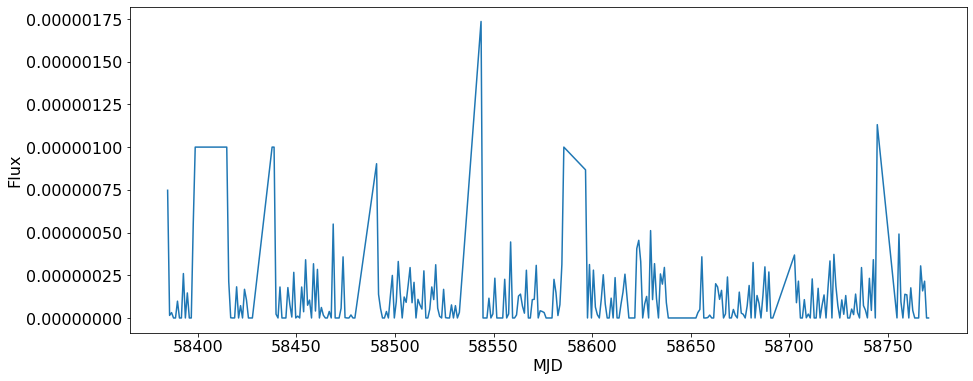

In [17]:
plt.plot(df.flux)
#plt.xlim(tiempo.min(),tiempo.max())
plt.xlabel("MJD")
plt.ylabel("Flux")

/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


Text(0, 0.5, 'PSD')

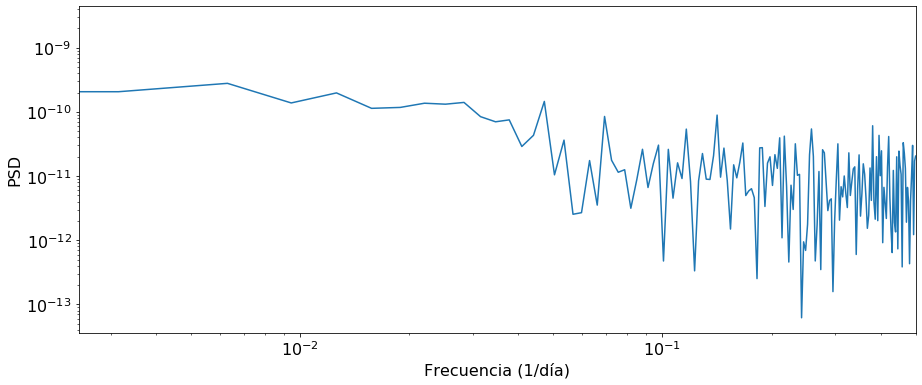

In [18]:
psd = np.abs(np.fft.rfft(df.flux))**2
freqs = np.fft.rfftfreq(len(df.flux))
plt.loglog(freqs,psd,'-')
plt.xlim(min(freqs), max(freqs))
plt.xlabel("Frecuencia (1/día)")
plt.ylabel("PSD")

Text(0, 0.5, 'PSD')

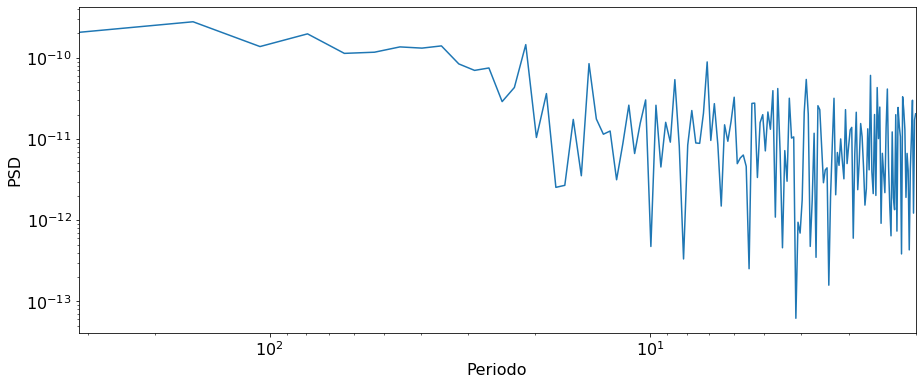

In [19]:
psd = np.abs(np.fft.rfft(df.flux))**2
freqs = np.fft.rfftfreq(len(df.flux))
psd = psd[1:]
freqs = freqs[1:]
periodos = 1/freqs#/365.25
plt.loglog(periodos, psd, '-')
#plt.axvline(11, linestyle="--", color="black")
plt.xlim(min(periodos), max(periodos))
plt.gca().invert_xaxis()
plt.xlabel("Periodo")
plt.ylabel("PSD")